In [1]:
from py4j.java_gateway import JavaGateway
import matplotlib.pyplot as plt

gateway = JavaGateway()

print ("load data ...")
# read infrastructure, rollingstocks and timetable data
timetable_entry = gateway.createTimetableSimulationEntry("c:\\temp\\raildata\\infrastructure",
    "c:\\temp\\raildata\\rollingstocks",
    "c:\\temp\\raildata\\timetable")

simulator = timetable_entry.getSimulator()

print ("data loaded.")

load data ...
data loaded.


In [2]:
# get all tri
trips = timetable_entry.getUtilities().getTrips(-1, -1)
print("number of trips: ", len(trips)) # 2. get number of trips

number of trips:  240


In [3]:
first_trip = trips[0]
print(first_trip.getNumber()) # 1. The vehicle ID

# A trip has one or more tripsections
# In each trip section there are several trip elements, for each trip element, you can search the name of operational point (stop)
# the arrive time, the departure time.
# The hour, minute and second of time can be read though getHour()/getMinute()/getSecond()

for trip_section in first_trip.getTripSections():
    
    # 3. The original stop/station is the first trip element
    # 4. The destination stop/station is the last trip element
    # 5.6. In between the sequece of trip element can be found
    index = 0
    for trip_element in trip_section.getTripElements():

        print("Operational Point: {0}, Arrive Time: {1}, Departure Time: {2}".format(
            trip_element.getOperationalPoint(), 
            trip_element.getArriveTime(), # 11. Scheduled arrive time
            trip_element.getDepartureTime())) # 8. Scheduled departure time
        print("Arrive Time - Hour: {0}, Minute: {1}, Second: {2}".format(
            trip_element.getArriveTime().getHour(), 
            trip_element.getArriveTime().getMinute(), 
            trip_element.getArriveTime().getSecond()))
        print("Station - id: {0}, name: {1}, abbreviation: {2}".format( # 15. Station name 
            trip_element.getStation().getId(), 
            trip_element.getStation().getDescription(), 
            trip_element.getStation().getName()))
        
        if index > 0:
            path = trip_section.getNextPathStartFrom(index - 1)
            print("Length from last stop [meter]: ", path.getLength().getMeter()) # 7. Length of the section
            
        index += 1

33_0
Operational Point: OperationalPointMainSignal: Bahnhof Adorf.N-5.N-5, Arrive Time: 04:20:56.0 d:0, Departure Time: 04:26:29.0 d:0
Arrive Time - Hour: 4, Minute: 20, Second: 56
Station - id: 1, name: Bahnhof Adorf, abbreviation: Adorf
Operational Point: OperationalPointMainSignal: Haltepunkt Bwald.N-2.N-2, Arrive Time: 04:34:35.0 d:0, Departure Time: 04:34:35.0 d:0
Arrive Time - Hour: 4, Minute: 34, Second: 35
Station - id: 10, name: Haltepunkt Bwald, abbreviation: Bwald
Length from last stop [meter]:  9590.0
Operational Point: OperationalPointMainSignal: Abzweig Cheim.N-1.N-1, Arrive Time: 04:39:16.0 d:0, Departure Time: 04:39:16.0 d:0
Arrive Time - Hour: 4, Minute: 39, Second: 16
Station - id: 2, name: Abzweig Cheim, abbreviation: Cheim
Length from last stop [meter]:  12489.0
Operational Point: OperationalPointMainSignal: Bahnhof Dstadt.N-1.N-1, Arrive Time: 04:46:56.0 d:0, Departure Time: 04:48:56.0 d:0
Arrive Time - Hour: 4, Minute: 46, Second: 56
Station - id: 21, name: Bahnho

In [4]:
# the simulation period will be set from 2:00 to 3:00
timetable_entry.setSimulationTime(simulator, 2, 3)

print("run simulation ...")
simulator.run()

# the results of simulation can be customized by user

run simulation ...


In [5]:
for train_simulator in simulator.getTrainSimulators():
    print(train_simulator.getTrain().getNumber())
    
    arrive_deviations = train_simulator.getArriveDeviations()
    departure_deviations = train_simulator.getDepartureDeviations()
    
    index = 0
    for trip_element in train_simulator.getTripSection().getTripElements():
        actual_arrive = trip_element.getArriveTime().add(arrive_deviations[index]) # 12. Actual arrival time
        actual_departure = trip_element.getDepartureTime().add(departure_deviations[index]) # 9. Actual departure time
        
        print("Actual arrive time: {0}, Deviation: {1}".format(actual_arrive, arrive_deviations[index]))
        print("Actual departure time : {0}, Deviation: {1}".format(actual_departure, departure_deviations[index]))
        
        index += 1
    
    #break

114_0
Actual arrive time: 02:38:47.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 02:39:59.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 02:49:04.9 d:0, Deviation: Duration [Seconds=6.009]
Actual departure time : 02:49:34.9 d:0, Deviation: Duration [Seconds=6.009]
Actual arrive time: 02:58:37.82 d:0, Deviation: Duration [Seconds=15.082]
Actual departure time : 02:59:07.82 d:0, Deviation: Duration [Seconds=15.082]
Actual arrive time: 03:05:38.441 d:0, Deviation: Duration [Seconds=0.441]
Actual departure time : 03:06:50.441 d:0, Deviation: Duration [Seconds=0.441]
Actual arrive time: 03:11:58.291 d:0, Deviation: Duration [Seconds=30.291]
Actual departure time : 03:12:28.291 d:0, Deviation: Duration [Seconds=30.291]
Actual arrive time: 03:19:20.898 d:0, Deviation: Duration [Seconds=34.898]
Actual departure time : 03:19:50.898 d:0, Deviation: Duration [Seconds=34.898]
Actual arrive time: 03:28:53.971 d:0, Deviation: Duration [Seconds=43.971]
Actual depa

Actual departure time : 03:16:03.171 d:0, Deviation: Duration [Seconds=34.171]
78_0
Actual arrive time: 02:53:13.608 d:0, Deviation: Duration [Seconds=685.608]
Actual departure time : 02:55:25.608 d:0, Deviation: Duration [Seconds=685.608]
Actual arrive time: 03:02:36.785 d:0, Deviation: Duration [Seconds=672.785]
Actual departure time : 03:02:36.785 d:0, Deviation: Duration [Seconds=672.785]
Actual arrive time: 03:08:49.201 d:0, Deviation: Duration [Seconds=685.201]
Actual departure time : 03:09:49.201 d:0, Deviation: Duration [Seconds=685.201]
Actual arrive time: 03:42:49.256 d:0, Deviation: Duration [Seconds=2,073.256]
Actual departure time : 03:44:49.256 d:0, Deviation: Duration [Seconds=2,073.256]
Actual arrive time: 04:01:38.577 d:0, Deviation: Duration [Seconds=1,916.577]
Actual departure time : 04:02:38.577 d:0, Deviation: Duration [Seconds=1,916.577]
Actual arrive time: 04:13:56.638 d:0, Deviation: Duration [Seconds=1,862.638]
Actual departure time : 04:14:56.638 d:0, Deviatio

209_0
Actual arrive time: 02:13:46.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 02:14:58.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 02:26:57.923 d:0, Deviation: Duration [Seconds=-106.077]
Actual departure time : 02:37:17.923 d:0, Deviation: Duration [Seconds=-106.077]
Actual arrive time: 02:47:36.665 d:0, Deviation: Duration [Seconds=-242.335]
Actual departure time : 02:55:11.665 d:0, Deviation: Duration [Seconds=-242.335]
Actual arrive time: 03:05:45.572 d:0, Deviation: Duration [Seconds=-313.428]
Actual departure time : 03:05:45.572 d:0, Deviation: Duration [Seconds=-313.428]
Actual arrive time: 03:11:41.209 d:0, Deviation: Duration [Seconds=-334.791]
Actual departure time : 03:12:41.209 d:0, Deviation: Duration [Seconds=-334.791]
Actual arrive time: 03:19:24.276 d:0, Deviation: Duration [Seconds=-308.724]
Actual departure time : 03:19:24.276 d:0, Deviation: Duration [Seconds=-308.724]
Actual arrive time: 03:25:43.724 d:0, Deviation: Duratio

Actual departure time : 02:50:47.486 d:0, Deviation: Duration [Seconds=-73.514]
Actual arrive time: 02:55:49.80 d:0, Deviation: Duration [Seconds=-52.920]
Actual departure time : 02:55:49.80 d:0, Deviation: Duration [Seconds=-52.920]
Actual arrive time: 03:14:17.685 d:0, Deviation: Duration [Seconds=595.685]
Actual departure time : 03:16:17.685 d:0, Deviation: Duration [Seconds=595.685]
Actual arrive time: 03:42:50.256 d:0, Deviation: Duration [Seconds=1,159.256]
Actual departure time : 03:42:50.256 d:0, Deviation: Duration [Seconds=1,159.256]
Actual arrive time: 03:52:42.631 d:0, Deviation: Duration [Seconds=1,212.631]
Actual departure time : 03:52:42.631 d:0, Deviation: Duration [Seconds=1,212.631]
Actual arrive time: 04:04:53.254 d:0, Deviation: Duration [Seconds=1,419.254]
Actual departure time : 04:04:53.254 d:0, Deviation: Duration [Seconds=1,419.254]
Actual arrive time: 04:10:58.511 d:0, Deviation: Duration [Seconds=1,482.511]
Actual departure time : 04:10:58.511 d:0, Deviation:

Actual departure time : 02:56:35.317 d:0, Deviation: Duration [Seconds=286.317]
Actual arrive time: 03:01:43.167 d:0, Deviation: Duration [Seconds=316.167]
Actual departure time : 03:02:13.167 d:0, Deviation: Duration [Seconds=316.167]
Actual arrive time: 03:09:05.774 d:0, Deviation: Duration [Seconds=320.774]
Actual departure time : 03:09:35.774 d:0, Deviation: Duration [Seconds=320.774]
Actual arrive time: 03:18:38.847 d:0, Deviation: Duration [Seconds=329.847]
Actual departure time : 03:19:08.847 d:0, Deviation: Duration [Seconds=329.847]
Actual arrive time: 03:25:50.795 d:0, Deviation: Duration [Seconds=327.795]
Actual departure time : 03:27:50.795 d:0, Deviation: Duration [Seconds=327.795]
Actual arrive time: 03:32:27.362 d:0, Deviation: Duration [Seconds=334.362]
Actual departure time : 03:32:57.362 d:0, Deviation: Duration [Seconds=334.362]
Actual arrive time: 03:41:30.503 d:0, Deviation: Duration [Seconds=327.503]
Actual departure time : 03:42:24.503 d:0, Deviation: Duration [S

Actual departure time : 03:29:23.116 d:0, Deviation: Duration [Seconds=-344.884]
Actual arrive time: 03:37:08.769 d:0, Deviation: Duration [Seconds=-479.231]
Actual departure time : 03:39:48.769 d:0, Deviation: Duration [Seconds=-479.231]
Actual arrive time: 03:49:20.190 d:0, Deviation: Duration [Seconds=-527.810]
Actual departure time : 03:49:20.190 d:0, Deviation: Duration [Seconds=-527.810]
Actual arrive time: 03:54:49.69 d:0, Deviation: Duration [Seconds=-581.931]
Actual departure time : 03:55:49.69 d:0, Deviation: Duration [Seconds=-581.931]
Actual arrive time: 04:01:40.280 d:0, Deviation: Duration [Seconds=-595.720]
Actual departure time : 04:01:40.280 d:0, Deviation: Duration [Seconds=-595.720]
Actual arrive time: 04:07:29.994 d:0, Deviation: Duration [Seconds=-628.006]
Actual departure time : 04:08:23.994 d:0, Deviation: Duration [Seconds=-628.006]


Train number:  114_0


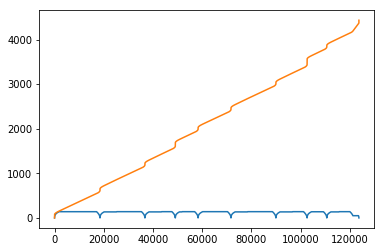

Train number:  137_0


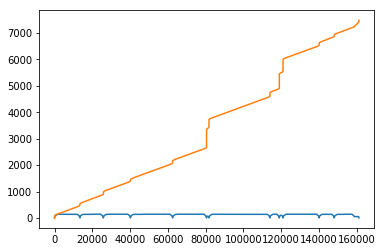

Train number:  18_0


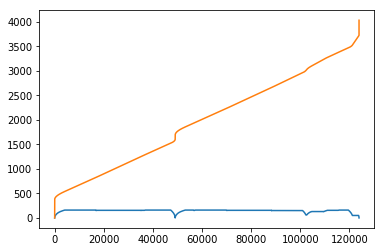

Train number:  186_0


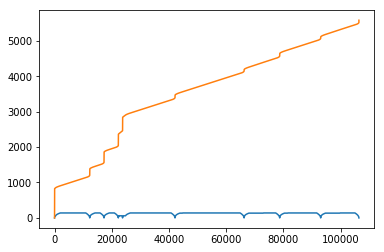

Train number:  102_0


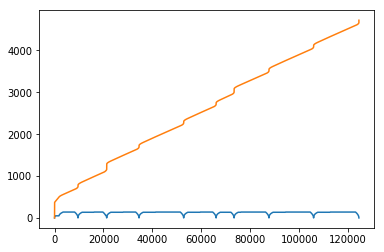

Train number:  29_0


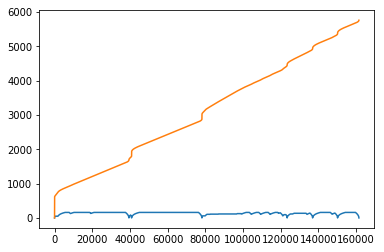

Train number:  125_0


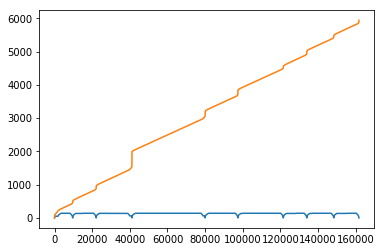

Train number:  174_0


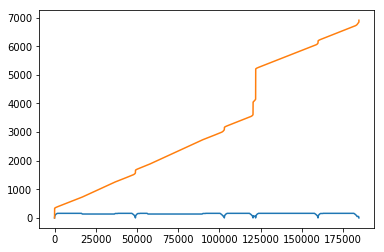

Train number:  17_0


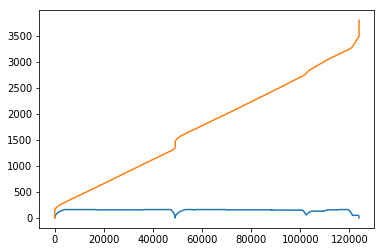

Train number:  78_0


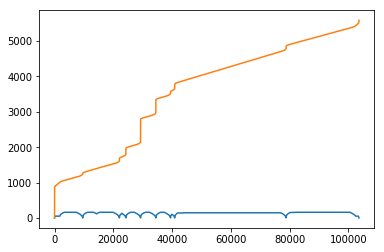

Train number:  138_0


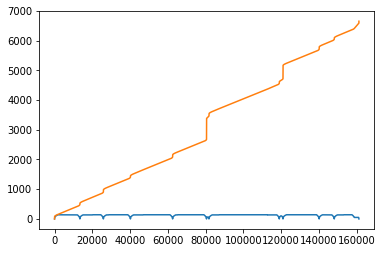

Train number:  6_0


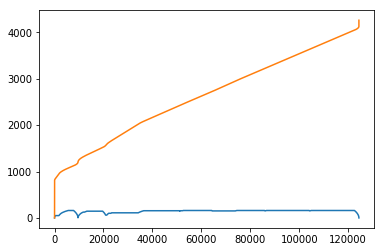

Train number:  89_0


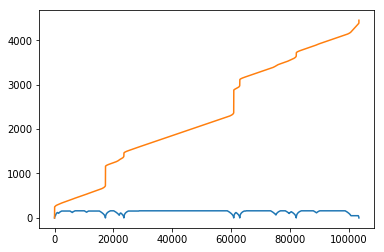

Train number:  126_0


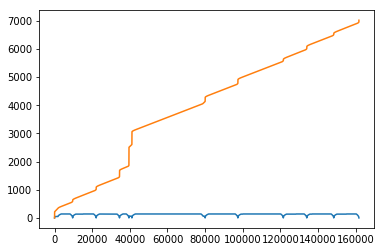

Train number:  149_0


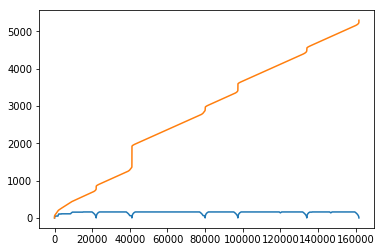

Train number:  209_0


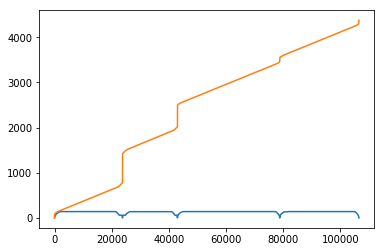

Train number:  77_0


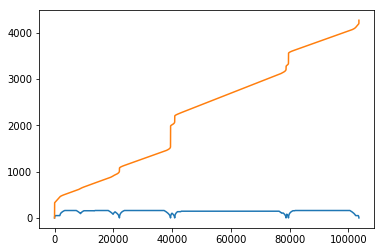

Train number:  54_0


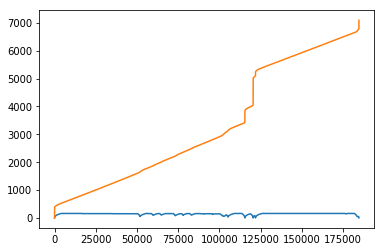

Train number:  5_0


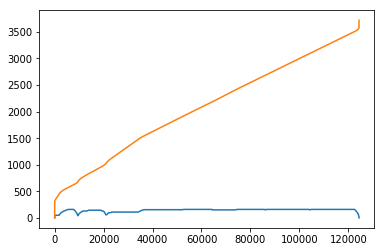

Train number:  42_0


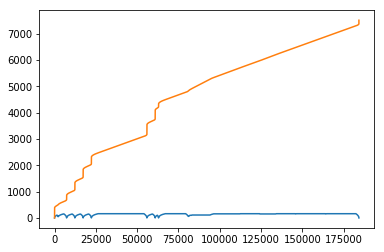

Train number:  53_0


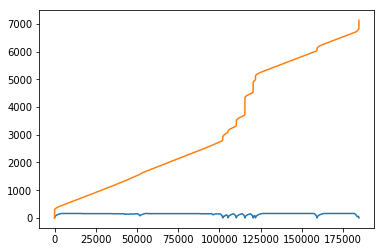

Train number:  30_0


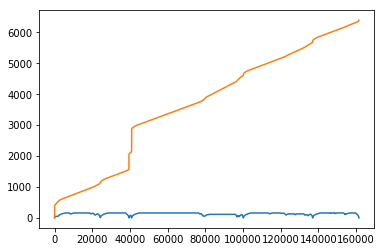

Train number:  41_0


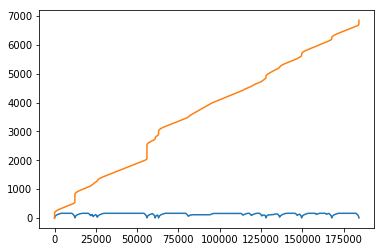

Train number:  90_0


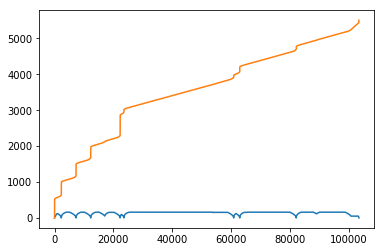

Train number:  210_0


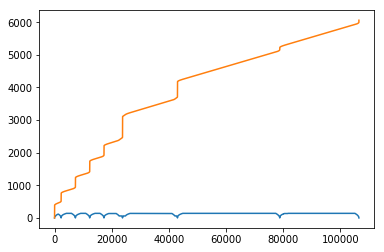

Train number:  161_0


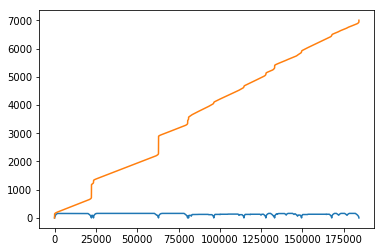

Train number:  233_0


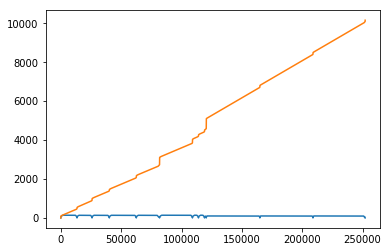

Train number:  113_0


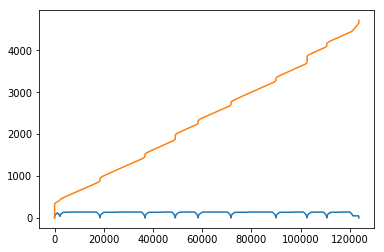

Train number:  185_0


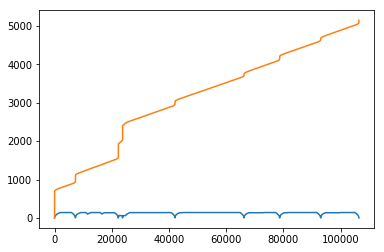

Train number:  162_0


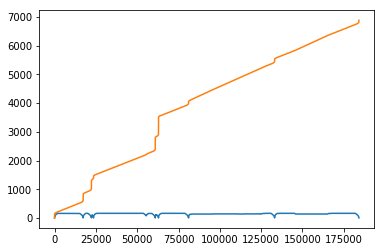

Train number:  234_0


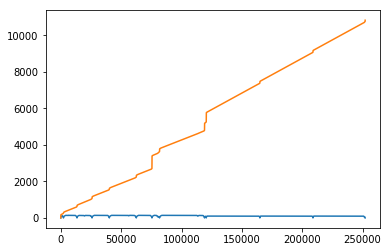

Train number:  101_0


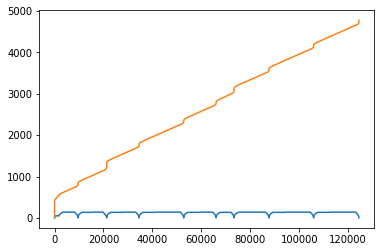

Train number:  173_0


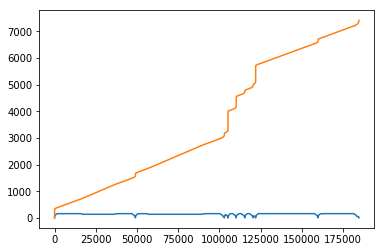

Train number:  150_0


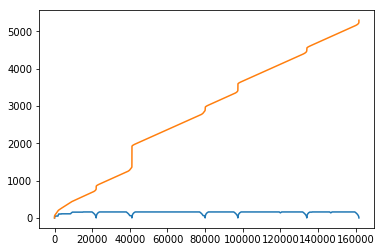

In [6]:
for train_simulator in simulator.getTrainSimulators():
    print("Train number: ", train_simulator.getTrain().getNumber())
    # inside a course there are many DiscretePoint, which describes running dynamics
    course = train_simulator.getWholeCoursePoints()
    
    distances = []
    velocities = []
    times = []
    meter = 0
    time = 0
            
    for point in course:
        meter += point.getDistance().getMeter()
        time += point.getDuration().getTotalSeconds()
        distances.append(meter);
        times.append(time)
        velocities.append(point.getVelocity().getKilometerPerHour())
    
    plt.plot(distances, velocities) # 22. 24. Location of the train (from start station) and Velocity(Scheduled running trajectory)
    plt.plot(distances, times)
    plt.show()
    
    # break # only print the first one

In [7]:
# 17. Scheduled waiting time (after timetable simulation)
print("Total waiting time in seconds: ", simulator.getDispatchingSystem().getTotalPending().getTotalSeconds())

Total waiting time in seconds:  48424.90600000001


In [8]:
def output_occupancy():
    print ("Occupancy time of tracks:")
    elements = timetable_entry.getAllInfrastructureElements()
    for element in elements:
        oMap = timetable_entry.getOccupancyMap(simulator, element)
        if oMap is not None:
            print ("Track Id: ", element, ":")
            lastKey = 0;
            for key in oMap:
                if key != 0:
                    print ("    ", lastKey, "-", key, "m:", oMap[key])
                lastKey = key
            print()

output_occupancy()

Occupancy time of tracks:
Track Id:  115.ADORF - 1.ADORF :
     0.0 - 100.0 m: Duration [Seconds=1,808.225]
     100.0 - 1374.0 m: Duration [Seconds=2,602.820]
     1374.0 - 1506.0 m: Duration [Seconds=0.000]

Track Id:  116.ADORF - 23.ADORF :
     0.0 - 100.0 m: Duration [Seconds=873.238]
     100.0 - 1234.0 m: Duration [Seconds=475.643]
     1234.0 - 1378.0 m: Duration [Seconds=0.000]

Track Id:  29.ADORF - 111.01_A-C :
     0.0 - 2000.0 m: Duration [Seconds=2,681.463]
     2000.0 - 7000.0 m: Duration [Seconds=2,260.763]
     7000.0 - 7300.0 m: Duration [Seconds=2,339.144]

Track Id:  102.ADORF - 3.ADORF :
     0.0 - 1355.0 m: Duration [Seconds=1,439.526]
     1355.0 - 1499.0 m: Duration [Seconds=0.000]

Track Id:  6.ADORF - 5.ADORF :
     0.0 - 1017.0 m: Duration [Seconds=1,402.312]
     1017.0 - 1204.0 m: Duration [Seconds=0.000]

Track Id:  30.ADORF - 30.ADORF :

Track Id:  172.CHEIM - 164.CHEIM :
     0.0 - 20.0 m: Duration [Seconds=2,583.955]

Track Id:  164.CHEIM - 173.02_C-S :

     7000.0 - 12000.0 m: Duration [Seconds=1,925.537]
     12000.0 - 12300.0 m: Duration [Seconds=1,424.843]

Track Id:  179.02_C-S - 180.02_C-S :
     0.0 - 50.0 m: Duration [Seconds=809.658]
     50.0 - 950.0 m: Duration [Seconds=1,509.872]

Track Id:  78.Dstadt - 78.Dstadt :

Track Id:  75.Dstadt - 75.Dstadt :

Track Id:  77.Dstadt - 77.Dstadt :

Track Id:  74.Dstadt - 74.Dstadt :

Track Id:  148.Dstadt - 149.Dstadt :
     0.0 - 1000.0 m: Duration [Seconds=4,697.131]
     1000.0 - 1100.0 m: Duration [Seconds=541.158]

Track Id:  76.Dstadt - 83.EBURG :
     0.0 - 300.0 m: Duration [Seconds=5,048.727]
     300.0 - 5300.0 m: Duration [Seconds=4,578.123]
     5300.0 - 10300.0 m: Duration [Seconds=3,535.842]
     10300.0 - 15300.0 m: Duration [Seconds=2,570.682]
     15300.0 - 20300.0 m: Duration [Seconds=2,350.687]
     20300.0 - 25300.0 m: Duration [Seconds=2,334.617]
     25300.0 - 30300.0 m: Duration [Seconds=2,299.737]
     30300.0 - 35300.0 m: Duration [Seconds=1,723.652]
     3530